<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#QuTiP,-1D-&amp;-2D-Lattices" data-toc-modified-id="QuTiP,-1D-&amp;-2D-Lattices-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>QuTiP, 1D &amp; 2D Lattices</a></span><ul class="toc-item"><li><span><a href="#Suppress-matplotlib-warnings" data-toc-modified-id="Suppress-matplotlib-warnings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Suppress matplotlib warnings</a></span></li><li><span><a href="#switch-Class-Definition" data-toc-modified-id="switch-Class-Definition-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><code>switch</code> Class Definition</a></span></li><li><span><a href="#hashQobj-class-definition" data-toc-modified-id="hashQobj-class-definition-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><code>hashQobj</code> class definition</a></span></li><li><span><a href="#Sandbox" data-toc-modified-id="Sandbox-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Sandbox</a></span></li><li><span><a href="#qutipLattice-Class-Definition" data-toc-modified-id="qutipLattice-Class-Definition-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span><code>qutipLattice</code> Class Definition</a></span></li><li><span><a href="#qutipHamiltonian-Class-Definition" data-toc-modified-id="qutipHamiltonian-Class-Definition-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span><code>qutipHamiltonian</code> Class Definition</a></span></li><li><span><a href="#1D-AKLT-Lattice" data-toc-modified-id="1D-AKLT-Lattice-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>1D AKLT Lattice</a></span><ul class="toc-item"><li><span><a href="#Single-site-AKLT-Hamiltonian" data-toc-modified-id="Single-site-AKLT-Hamiltonian-1.7.1"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Single-site AKLT Hamiltonian</a></span></li><li><span><a href="#Initialize-to-Random-State" data-toc-modified-id="Initialize-to-Random-State-1.7.2"><span class="toc-item-num">1.7.2&nbsp;&nbsp;</span>Initialize to Random State</a></span></li><li><span><a href="#Draw-the-Lattice" data-toc-modified-id="Draw-the-Lattice-1.7.3"><span class="toc-item-num">1.7.3&nbsp;&nbsp;</span>Draw the Lattice</a></span></li><li><span><a href="#Profile-Lattice-Energy-Calculation" data-toc-modified-id="Profile-Lattice-Energy-Calculation-1.7.4"><span class="toc-item-num">1.7.4&nbsp;&nbsp;</span>Profile Lattice Energy Calculation</a></span></li><li><span><a href="#Density-of-States" data-toc-modified-id="Density-of-States-1.7.5"><span class="toc-item-num">1.7.5&nbsp;&nbsp;</span>Density of States</a></span></li></ul></li><li><span><a href="#2D-Spin-Glass-Lattice" data-toc-modified-id="2D-Spin-Glass-Lattice-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>2D Spin-Glass Lattice</a></span></li></ul></li></ul></div>

# QuTiP, 1D & 2D Lattices

In [1]:
import networkx as nx
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt

In [4]:
from qutip import *

In [2]:
%matplotlib inline

## Suppress matplotlib warnings

In [7]:
import warnings

In [9]:
warnings.filterwarnings("ignore")

## `switch` Class Definition

Reference: [ActiveState Recipes](http://code.activestate.com/recipes/410692/)

Example Usage:

The following example is pretty much the exact use-case of a dictionary, but is included for its simplicity. Note that you can include statements in each suite.
    
```
v = 'ten'
for case in switch(v):
    if case('one'):
        print 1
        break
    if case('two'):
        print 2
        break
    if case('ten'):
        print 10
        break
    if case('eleven'):
        print 11
        break
    if case(): # default, could also just omit condition or 'if True'
        print "something else!"
        # No need to break here, it'll stop anyway
```

In [10]:
# This class provides the functionality we want. You only need to look at
# this if you want to know how this works. It only needs to be defined
# once, no need to muck around with its internals.
class switch(object):
    def __init__(self, value):
        self.value = value
        self.fall = False

    def __iter__(self):
        """Return the match method once, then stop"""
        yield self.match
        raise StopIteration
    
    def match(self, *args):
        """Indicate whether or not to enter a case suite"""
        if self.fall or not args:
            return True
        elif self.value in args: # changed for v1.5, see below
            self.fall = True
            return True
        else:
            return False

## `hashQobj` class definition

In [5]:
class hashQobj(Qobj):
    
    def __hash__(self):
        return hash(repr(self))

## Sandbox

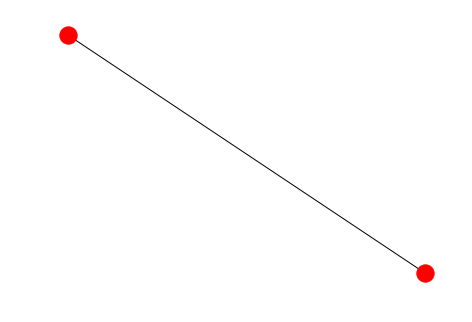

In [17]:
g = nx.grid_graph([2])
nx.draw(g,scale=0.5)

In [18]:
pos_dict = {}

In [19]:
i = 0
for node in g:
    print(node)
    pos_dict[node] = [i,0]
    i += 1

0
1


In [20]:
pos_dict

{0: [0, 0], 1: [1, 0]}

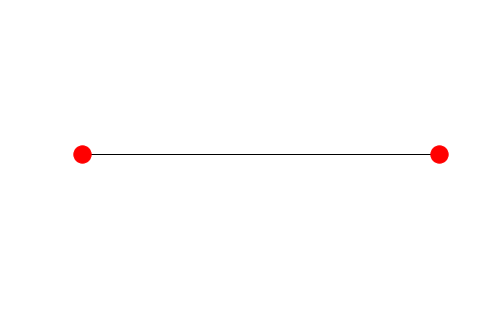

In [21]:
nx.draw(g,pos_dict)

In [51]:
dicteg = { "X": {"a": 1, "b": 2}, "Y": {"c": 3, "d": 4} }

In [53]:
key = "X"

In [54]:
dicteg[key]

{'a': 1, 'b': 2}

## `qutipLattice` Class Definition

In [22]:
class qutipLattice():
    
    hamiltonian = None
    
    hamOp = Qobj()
    
    graph = nx.empty_graph(0)
#     size = 10
    state_dims = 2
    state = np.empty([]) # create empty array
    colors = ['r','b','g','c','m','y','k','w']
    color_map = {}
#     upspin = hashQobj(basis(2,0))
#     dnspin = hashQobj(basis(2,1))
#     color_map = {upspin:'r', dnspin :'b'}
    state_values = []    # elements are hashQobj objects which are all possible states of a node allowed for particular model
    node_color_dict = {} # dictionary whose keys are nodes and values are colors for each node
    node_colors = []
    pos_dict = {}
    
    lattice_dims = [10]      # by default lattice dimension is 1d with 10 sites,
                             # in general will be list [x,y,z,...], indicating
                             # size of lattice along each dimension
    dimension = 1                 # dimensionality of lattice, by default 1d
    
    use_default_vars = True
    
    scale_mult = []
    
    def __init__(self,lattice_dims=[10],periodic=False,hamType=None,hamVars=None):
        
        if isinstance(lattice_dims,list) and len(lattice_dims)>0 and all(isinstance(i,int) for i in lattice_dims):
            self.lattice_dims = lattice_dims
            self.dimension = len(lattice_dims)
        else:
            raise ValueError('lattice_dim should be non-empty list of positive integers')
        
#         self.size = size
        
#         self.graph = nx.grid_2d_graph(size,size,periodic=periodic)

        self.graph = nx.grid_graph(self.lattice_dims,periodic=periodic)
        
        for i in self.lattice_dims:
            self.scale_mult.append(10.0/i)
        
        if self.dimension == 1:
            for node in self.graph:
                self.pos_dict[node] = [self.scale_mult[0]*node,0]
        else:
            print("Dimension of Lattice: ", self.dimension)
            for node in self.graph:
                self.pos_dict[node] = [self.scale_mult[i]*node[i] for i in range(self.dimension)]
                # set the node co-ordinates to be same as node indices

        
        if hamType:
            self.hamiltonian = qutipHamiltonian(hamType,self.graph,hamVars)
            self.hamOp = self.hamiltonian.hamOp
            self.state_dims = self.hamiltonian.state_dims
            self.state_values = [hashQobj(basis(self.state_dims,i)) for i in range(self.state_dims)] # Possible states of a given site
            print(self.state_values)
            for i in range(self.state_dims):
                self.color_map[self.state_values[i]] = self.colors[i]
            self.setRandomState()
    
    def setRandomState(self):
        '''Iterates over all nodes in the graph. For each node, creates an attribute
        labeled 'state', and assigns to it at random QuTiP objects returned by basis(2,0) or basis(2,1)
        corresponding to spin up or spin down.'''

        for node in self.graph:
            self.graph.node[node]['state'] = self.state_values[np.random.randint(self.state_dims)]
            self.node_color_dict[node] = self.color_map[self.graph.node[node]['state']]

        self.node_colors = list(self.node_color_dict.values())
        
        return

    
    def nearestEnergy(self,node):
        energy = 0.
        for neighbor in self.graph[node]:
            tempstate = tensor(self.graph.node[node]['state'],self.graph.node[neighbor]['state'])
            energy += expect(self.hamOp,tempstate)
        return energy
    
    def nextNearestEnergy(self,node):
        energy = 0.
        for nearest in self.graph[node]:
            for nextnearest in self.graph[nearest]:
                if nextnearest!=node:
                    tempstate = tensor(self.graph.node[node]['state'],self.graph.node[nextnearest]['state'])
                    energy += expect(self.hamOp,tempstate)
        return energy
    
    def latticeEnergy(self):
        energy = 0
        for node in self.graph:
            energy = energy + self.nearestEnergy(node)
        return energy
    
    def draw(self):
        nx.draw(self.graph,pos=self.pos_dict,node_color=self.node_colors)
                

## `qutipHamiltonian` Class Definition

In [73]:
class qutipHamiltonian():
    '''Class which defines the hamiltonian acting on a given site of a lattice'''
    
    hamTypes = ['NumberOp', 'Ising', 'Heisenberg','Hubbard', 'AKLT', 'SpinGlass']
    
    defaultVars = {'NumberOp':   {'J':1, 'dims': 2},
                   'Ising':      {'J': 1, 'mu': 0, 'extfield': 0, 'spin': 0.5},
                   'Heisenberg': {'J': 1, 'mu': 0, 'extfield': 0, 'spin': 0.5, 'dims': 3},
                   'Hubbard':    {'J': 1, 'U': 0, 'mu': 1, 'spin': 0.5, 'extfield': 0},
                   'SpinGlass':  {'J': 1, 'mu': 0, 'spin': 0.5, 'extfield': 0 },
                   'AKLT':       {'J': 1, 'spin': 1, 'dims': 3}
              }             # default values of Hamiltonian parameters
    
    hamType = None          # type of Hamiltonian: Ising, Heisenberg, Hubbard etc.
    
    hamOp = Qobj()          # single-site Hamiltonian operator
    
    hamVars = {}            # parameters necessary for defining Hamiltonian, coupling strengths, etc.
    
    graph = None            # graph on which Hamiltonian is defined.
    
    state_dims = 2                # dimension of single particle Hilbert space.
    
    latticeDimension = 2    # dimension of lattice on which Hamiltonian is defined.

    latticeSize = (5,5)     # tuple containing number of sites in lattice, should match latticeDimension.
    
    def __init__(self, hamType, graph=None, hamVars=None):
        
        if hamType != None:
            if hamType not in self.hamTypes:
                raise ValueError('hamType must be one of ',self.hamTypes)
            else:
                self.hamType = hamType
                self.initHamiltonian(graph,hamType,hamVars)
                
    def initHamiltonian(self,graph,hamType,hamVars):
        
        if graph!=None:
            self.graph = graph
        else:
            print('Lattice is not defined.')
        
        defVars = self.defaultVars[hamType]
        
        print(defVars)
        
        if hamVars:
            if set(hamVars.keys()).issubset(set(defVars.keys())):
                self.setHamiltonianVars(hamType,hamVars)
                self.setHamiltonianOp(hamType)
            else:
                raise ValueError('Hamiltonian variables for', self.hamType, 'model, should subset of:'\
                                            ,defVars)
        else:
            print('Hamiltonian parameters not specified. Using default values')
            self.setHamiltonianVars(hamType,defVars)
            self.setHamiltonianOp(hamType)
            
        return
    
    def setHamiltonianVars(self,hamType,hamVars):

        self.hamVars = self.defaultVars.get(hamType)
        for k in hamVars.keys():
            self.hamVars[k] = hamVars[k]    

        for case in switch(hamType):
            if case('Ising'):
                print('Ising')
                self.J = self.hamVars['J']
                self.mu = self.hamVars['mu']
                self.h = self.hamVars['extfield']
                break

            if case('Hubbard'):
                print('Hubbard')
                self.J = self.hamVars['J']
                self.mu = self.hamVars['mu']
                self.h = self.hamVars['extfield']
                self.U = self.hamVars['U']
                break
                
            if case('Heisenberg'):
                print('Heisenberg')
                self.J = self.hamVars['J']
                self.h = self.hamVars['extfield']
                self.mu = self.hamVars['mu']
                self.state_dims = 3     # Heisenberg spin-chain has spin 1 particles
                break
            
            if case('AKLT'):
                print('AKLT')
                self.J = self.hamVars['J']
                
#             if case('SpinGlass'):
#                 if hamVars:
#                     self.J_ij = hamVars['J_ij']
#                     self.h = hamVars['extfield']
#                     self.mu = hamVars['mu']
#                 else:
#                     self.J = 1
#                     self.h = 0
#                     self.mu = 0
#                 break
                
            if case('NumberOp'):
                break
            
            return
                
    def setHamiltonianOp(self,hamType):
        if self.hamVars.get('dims'):
            self.state_dims = self.hamVars['dims']
        else:
            self.state_dims = 2

        dim = self.state_dims
        j = (dim-1)/2.0
        
        sx = jmat(j,'x')
        sy = jmat(j,'y')
        sz = jmat(j,'z')
        sp = jmat(j,'+')
        sm = jmat(j,'-')
        identity = qeye(dim)
        
        
        for case in switch(hamType):
            if case('Ising'):
                self.hamOp = -self.J * tensor(sz,sz) \
                                            - self.mu * self.h * tensor(sz,identity)
                break
            
            if case('AKLT'):
                self.hamOp = self.J * (tensor(sx,sx) + tensor(sy,sy) + tensor(sz,sz))
                self.hamOp += self.J/3.0 * (tensor(sx,sx) + tensor(sy,sy) + tensor(sz,sz))**2
            
            if case('Hubbard'):
                break
                
            if case('Heisenberg'):
                self.hamOp = -0.5*self.J * (tensor(sp,sm) + tensor(sm,sp))
                self.hamOp += -self.J * tensor(sz,sz)
                break
                
#             if case('SpinGlass'):
#                 if hamVars:
#                     self.J_ij = hamVars['J_ij']
#                     self.h = hamVars['extfield']
#                     self.mu = hamVars['mu']
#                 else:
#                     self.J = 1
#                     self.h = 0
#                     self.mu = 0
#                 break
                
            if case('NumberOp'):
                break        
            
            return
    
    @property
    def hermitian(self):
        return self._isHermitian
    
    @hermitian.setter
    def hermitian(self, value):
        if isinstance(value, bool):
            self._isHermitian = value
        else:
            raise ValueError('hermitian must be a boolean data type')

## 1D AKLT Lattice

In [74]:
latt = qutipLattice(lattice_dims=[10],hamType='AKLT',periodic=False)

{'J': 1, 'spin': 1, 'dims': 3}
Hamiltonian parameters not specified. Using default values
AKLT
[Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]
 [ 0.]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.]
 [ 1.]
 [ 0.]], Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 1.]]]


### Single-site AKLT Hamiltonian

In [57]:
latt.hamOp

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[ 1.33333333  0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.33333333  0.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.         -0.33333333  0.          0.66666667  0.
   0.33333333  0.          0.        ]
 [ 0.          1.          0.          0.33333333  0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.66666667  0.          0.66666667  0.
   0.66666667  0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.33333333
   0.          1.          0.        ]
 [ 0.          0.          0.33333333  0.          0.66666667  0.
  -0.33333333  0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.33333333  0.        ]
 [ 0.          0.          0.          0.          0.   

### Initialize to Random State

In [58]:
latt.setRandomState()

### Draw the Lattice

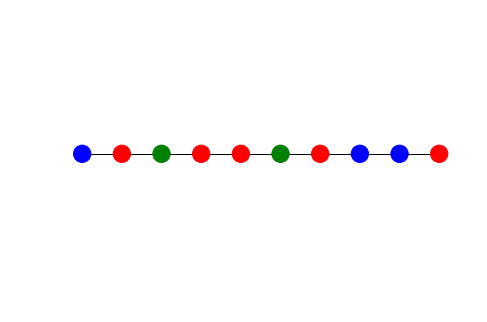

In [59]:
latt.draw()

### Profile Lattice Energy Calculation

In [60]:
%timeit(latt.latticeEnergy())

4.11 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Density of States

In [61]:
energies = []
for i in range(100):
    latt.setRandomState()
    energies.append(latt.latticeEnergy())

(array([  2.,   1.,   2.,   4.,   3.,   8.,   6.,   5.,  18.,   9.,   6.,
         11.,   7.,   4.,   7.,   4.,   1.,   0.,   1.,   1.]),
 array([  1.11022302e-15,   9.00000000e-01,   1.80000000e+00,
          2.70000000e+00,   3.60000000e+00,   4.50000000e+00,
          5.40000000e+00,   6.30000000e+00,   7.20000000e+00,
          8.10000000e+00,   9.00000000e+00,   9.90000000e+00,
          1.08000000e+01,   1.17000000e+01,   1.26000000e+01,
          1.35000000e+01,   1.44000000e+01,   1.53000000e+01,
          1.62000000e+01,   1.71000000e+01,   1.80000000e+01]),
 <a list of 20 Patch objects>)

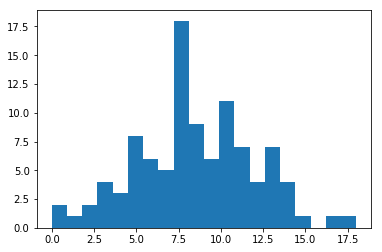

In [62]:
plt.hist(energies,bins=20)

In [63]:
uniq_energies = set(energies)
print(uniq_energies)

{1.1102230246251565e-15, 1.3333333333333357, 2.6666666666666687, 3.333333333333334, 4.666666666666668, 5.333333333333337, 6.66666666666667, 7.333333333333336, 8.666666666666671, 9.333333333333336, 8.0, 11.333333333333334, 10.666666666666666, 11.333333333333337, 6.000000000000003, 8.66666666666667, 10.666666666666668, 8.000000000000002, 13.333333333333332, 12.0, 14.000000000000002, 4.0000000000000036, 13.999999999999998, 17.999999999999996, 16.666666666666664, 5.333333333333336, 6.0000000000000036, 7.3333333333333375, 8.000000000000004, 8.666666666666668, 9.333333333333334, 9.333333333333337, 10.000000000000002, 10.000000000000004, 10.0, 10.000000000000005, 11.333333333333336, 12.000000000000002, 12.66666666666667, 12.666666666666668, 13.333333333333336, 13.333333333333334, 14.66666666666667, 2.0000000000000027, 0.666666666666669, 4.000000000000003, 4.666666666666669, 6.666666666666669, 6.000000000000001, 6.6666666666666705, 7.333333333333333}


In [64]:
energy_count = {}
for uniq in uniq_energies:
    energy_count[uniq] = energies.count(uniq)
print(energy_count)

{1.1102230246251565e-15: 1, 1.3333333333333357: 1, 2.6666666666666687: 1, 3.333333333333334: 4, 4.666666666666668: 4, 5.333333333333337: 1, 6.66666666666667: 1, 7.333333333333336: 6, 8.666666666666671: 3, 9.333333333333336: 2, 8.0: 2, 11.333333333333334: 3, 10.666666666666666: 2, 11.333333333333337: 1, 6.000000000000003: 2, 8.66666666666667: 5, 10.666666666666668: 3, 8.000000000000002: 5, 13.333333333333332: 3, 12.0: 3, 14.000000000000002: 3, 4.0000000000000036: 2, 13.999999999999998: 1, 17.999999999999996: 1, 16.666666666666664: 1, 5.333333333333336: 2, 6.0000000000000036: 1, 7.3333333333333375: 2, 8.000000000000004: 2, 8.666666666666668: 1, 9.333333333333334: 2, 9.333333333333337: 2, 10.000000000000002: 2, 10.000000000000004: 1, 10.0: 2, 10.000000000000005: 1, 11.333333333333336: 3, 12.000000000000002: 1, 12.66666666666667: 1, 12.666666666666668: 1, 13.333333333333336: 1, 13.333333333333334: 1, 14.66666666666667: 1, 2.0000000000000027: 1, 0.666666666666669: 1, 4.000000000000003: 1, 4

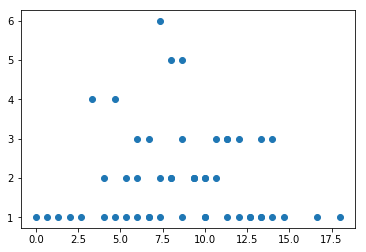

In [65]:
plt.scatter(list(energy_count.keys()),list(energy_count.values()))

## 2D Spin-Glass Lattice

In [69]:
latt2 = qutipLattice(lattice_dims=[4,4],periodic=True,hamType='SpinGlass',hamVars={'mu': 0, 'extfield': 0, 'J_ij': 1})

Dimension of Lattice:  2
{'J_ij': [[]], 'mu': 0, 'spin': 0.5, 'extfield': 0}
[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 1.]
 [ 0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.]
 [ 1.]]]


In [70]:
latt2.setRandomState()

print(latt2.latticeEnergy())

latt2.draw()

TypeError: Invalid operand types

In [ ]:
energies = []
for i in range(500):
    latt.setRandomState()
    energies.append(latt.latticeEnergy())

In [ ]:
plt.hist(energies,bins=40)

In [ ]:
energy_set = set(energies)
for e in sorted(energy_set):
    print(e,'\t',energies.count(e))

In [ ]:
print?

In [ ]:
latt.hamiltonianVars

In [ ]:
x = {'i':1,'j':2}
x

In [ ]:
x.values()

In [ ]:
x.get?

In [ ]:
x.get('k')

In [ ]:
set(x.keys())

In [ ]:
y = {'j':1,'i':2}
y

In [ ]:
set(x.keys()) ^ set(y.keys())

In [ ]:
x.keys() == y.keys()

In [ ]:
nx.grid_2d_graph?

In [ ]:
# Dead code

#     def hamiltonianIsing(self,node):
#         energy = 0.
#         for neighbor in self.graph[node]:
#             tempstate = tensor(self.graph.node[node]['state'],self.graph.node[neighbor]['state'])
#             energy += expect(self.hamOp)
# #             energy += -self.J*self.graph.node[node]['state']*self.graph.node[neighbor]['state']
# #             energy += -self.mu*self.h*self.graph.node[node]['state']
#         return energy
    
# #     def hamiltonianSpinGlass(self,node):
# #         energy = 0.
# #         for neighbor in self.graph[node]:
# #             energy += 0
    
#     def hamiltonianHubbard(self,node):
#         energy = 0.
# #         for neighbor in self.graph[node]:
# #             energy += -self.J*
#         return 0
    
#     def hamiltonianHeisenberg(self,node):
#         energy = 0.
#         for neighbor in graph[node]:
#             energy += -self.J*self.graph.node[node]['state']*self.graph.node[neighbor]['state']
#             energy += -self.mu*self.h*self.graph.node[node]['state']
#         return 0
    
#     def hamiltonianNumberOp(self,node):
#         return 0
    